In [1]:
import pandas as pd
import numpy as np

import os, sys
import pickle, functools, operator
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import joblib
from tensorflow.keras.utils import to_categorical
from keras.models import Model, load_model
from keras.layers import Input, LSTM, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
import json
import random
from keras.utils.vis_utils import plot_model

import tensorflow as tf
import datetime

In [7]:
training_df = pd.read_csv(os.getcwd() + "\\captions_lists\\training_list.csv")
val_df = pd.read_csv(os.getcwd() + "\\captions_lists\\validation_list.csv")

In [9]:
training_list = training_df.values.tolist()
validation_list = val_df.values.tolist()

In [10]:
for idx, cap in enumerate(training_list):
    print(idx, cap[1])

0 5232
1 5313
2 1583
3 2453
4 4982
5 4350
6 3158
7 3468
8 4087
9 2405
10 4500
11 5292
12 2461
13 4602
14 1174
15 5080
16 3472
17 1828
18 5312
19 4692
20 3933
21 4213
22 3831
23 5103
24 4817
25 5349
26 508
27 4333
28 2026
29 5364
30 2155
31 3780
32 3813
33 4291
34 5368
35 1989
36 3180
37 3816
38 4011
39 3626
40 1397
41 4052
42 2549
43 3790
44 4811
45 4368
46 4831
47 3751
48 2295
49 5119
50 4358
51 3307
52 3279
53 4107
54 4205
55 5031
56 2902
57 2413
58 1599
59 5087
60 4992
61 4712
62 4830
63 3700
64 4143
65 3861
66 3319
67 1502
68 4130
69 5130
70 782
71 4548
72 5375
73 4643
74 3621
75 3383
76 5104
77 5376
78 2280
79 4276
80 3068
81 5094
82 2291
83 4038
84 1198
85 4326
86 3584
87 3710
88 4543
89 2351
90 1539
91 4960
92 534
93 5233
94 413
95 3622
96 4948
97 1721
98 881
99 391
100 4441
101 2466
102 3888
103 2302
104 4140
105 4512
106 3135
107 4925
108 4678
109 3711
110 430
111 2153
112 4491
113 3732
114 4026
115 3997
116 578
117 4298
118 3946
119 5084
120 4915
121 1182
122 4514
123 5282
12

1460 5036
1461 4362
1462 1429
1463 30
1464 1399
1465 4676
1466 34
1467 5323
1468 2927
1469 4072
1470 5238
1471 488
1472 4101
1473 4069
1474 428
1475 3740
1476 290
1477 4755
1478 4358
1479 2088
1480 677
1481 5263
1482 5018
1483 4440
1484 4304
1485 5152
1486 5113
1487 3707
1488 5124
1489 3448
1490 3983
1491 3672
1492 3567
1493 2293
1494 1150
1495 2659
1496 4233
1497 4240
1498 1596
1499 2539
1500 3930
1501 4304
1502 4355
1503 26
1504 998
1505 3061
1506 3802
1507 5365
1508 2261
1509 339
1510 4300
1511 1477
1512 3917
1513 3545
1514 1374
1515 2323
1516 3332
1517 2645
1518 5261
1519 1592
1520 4713
1521 212
1522 4964
1523 2062
1524 4574
1525 985
1526 4070
1527 1131
1528 4524
1529 4257
1530 451
1531 4820
1532 4828
1533 4004
1534 3695
1535 4153
1536 1496
1537 5079
1538 4257
1539 4795
1540 1563
1541 667
1542 2303
1543 1970
1544 3828
1545 4965
1546 3866
1547 4424
1548 5310
1549 3670
1550 3611
1551 4717
1552 4666
1553 5025
1554 2292
1555 1677
1556 2054
1557 4948
1558 2307
1559 4976
1560 4744
1561 3

2995 3599
2996 4557
2997 4226
2998 5192
2999 3720
3000 4744
3001 2424
3002 1669
3003 5167
3004 4190
3005 2293
3006 1758
3007 737
3008 4267
3009 99
3010 4842
3011 694
3012 1105
3013 4835
3014 5278
3015 4166
3016 3692
3017 4656
3018 3626
3019 2129
3020 962
3021 2199
3022 930
3023 1788
3024 3415
3025 2728
3026 2901
3027 2512
3028 751
3029 1831
3030 239
3031 5062
3032 4921
3033 4529
3034 4971
3035 338
3036 2062
3037 5173
3038 4855
3039 4580
3040 3860
3041 2305
3042 25
3043 111
3044 2486
3045 3488
3046 1356
3047 507
3048 1529
3049 3953
3050 460
3051 5028
3052 3644
3053 3596
3054 4753
3055 2869
3056 5152
3057 4340
3058 3097
3059 4122
3060 2708
3061 3437
3062 3676
3063 4745
3064 2506
3065 4037
3066 92
3067 3768
3068 3377
3069 1422
3070 1619
3071 5081
3072 3927
3073 3868
3074 4030
3075 4363
3076 3634
3077 1459
3078 5092
3079 3728
3080 3107
3081 4413
3082 4647
3083 2683
3084 4636
3085 3819
3086 3140
3087 3733
3088 5388
3089 2102
3090 4873
3091 5234
3092 133
3093 4334
3094 4641
3095 1200
3096 40

4701 4626
4702 3113
4703 3489
4704 3436
4705 1374
4706 4817
4707 4461
4708 2333
4709 3190
4710 4288
4711 3609
4712 4766
4713 4328
4714 4494
4715 5007
4716 4370
4717 1988
4718 201
4719 2640
4720 5233
4721 3625
4722 3624
4723 4002
4724 4813
4725 3626
4726 4476
4727 749
4728 4116
4729 3543
4730 4892
4731 3672
4732 4441
4733 2640
4734 2284
4735 2610
4736 279
4737 3996
4738 362
4739 2221
4740 2650
4741 2115
4742 3646
4743 1979
4744 4356
4745 4573
4746 564
4747 1739
4748 2388
4749 4956
4750 4473
4751 284
4752 3003
4753 148
4754 3966
4755 4678
4756 3764
4757 5240
4758 5160
4759 5251
4760 4164
4761 2341
4762 2005
4763 4132
4764 4031
4765 4163
4766 1663
4767 4687
4768 2623
4769 5038
4770 473
4771 2275
4772 4307
4773 5211
4774 3198
4775 2922
4776 2230
4777 2359
4778 1528
4779 2886
4780 4153
4781 3072
4782 4170
4783 4183
4784 3467
4785 3565
4786 4001
4787 510
4788 432
4789 4610
4790 2312
4791 4465
4792 5363
4793 3708
4794 3083
4795 4541
4796 3818
4797 976
4798 5043
4799 4919
4800 1764
4801 2315
4

6425 2726
6426 2774
6427 4324
6428 3636
6429 3701
6430 3468
6431 121
6432 805
6433 5232
6434 4740
6435 2896
6436 3476
6437 4160
6438 506
6439 5098
6440 182
6441 2944
6442 5079
6443 1549
6444 2203
6445 4144
6446 3005
6447 5191
6448 4554
6449 4575
6450 4745
6451 4228
6452 3977
6453 2409
6454 3876
6455 3831
6456 2895
6457 4861
6458 4006
6459 5137
6460 1423
6461 4270
6462 4935
6463 4427
6464 4196
6465 5374
6466 2829
6467 2889
6468 4898
6469 637
6470 3798
6471 2535
6472 2673
6473 409
6474 2777
6475 5364
6476 465
6477 3807
6478 4038
6479 511
6480 741
6481 4143
6482 380
6483 1696
6484 3598
6485 711
6486 2368
6487 5035
6488 2657
6489 5101
6490 3314
6491 4944
6492 4167
6493 2708
6494 4049
6495 5331
6496 3474
6497 2654
6498 4523
6499 2366
6500 3481
6501 4683
6502 4261
6503 707
6504 2193
6505 4096
6506 1545
6507 3655
6508 2496
6509 3914
6510 4567
6511 4467
6512 5033
6513 2555
6514 739
6515 2830
6516 676
6517 1538
6518 4389
6519 4563
6520 5238
6521 3451
6522 4947
6523 2087
6524 1837
6525 2904
6526

8174 3731
8175 3822
8176 2500
8177 3715
8178 2174
8179 3727
8180 5220
8181 2480
8182 5395
8183 4429
8184 4860
8185 1612
8186 2920
8187 3103
8188 1986
8189 4751
8190 4899
8191 4419
8192 3399
8193 494
8194 4669
8195 4803
8196 1542
8197 2298
8198 4519
8199 4065
8200 4679
8201 3784
8202 4397
8203 14
8204 5375
8205 4871
8206 3832
8207 4089
8208 943
8209 3150
8210 4976
8211 3093
8212 3476
8213 3358
8214 774
8215 4815
8216 4870
8217 3034
8218 2028
8219 4169
8220 1917
8221 2521
8222 5145
8223 2463
8224 1925
8225 4236
8226 4783
8227 4894
8228 5280
8229 4329
8230 4969
8231 2710
8232 1760
8233 3548
8234 2515
8235 1103
8236 2114
8237 3640
8238 3803
8239 4469
8240 5097
8241 2991
8242 138
8243 3409
8244 5384
8245 3772
8246 4385
8247 3266
8248 1148
8249 5253
8250 4183
8251 422
8252 4999
8253 1502
8254 3912
8255 218
8256 3060
8257 3282
8258 3284
8259 4954
8260 3889
8261 4111
8262 2452
8263 3274
8264 2825
8265 3906
8266 2319
8267 678
8268 3565
8269 671
8270 3463
8271 4933
8272 2354
8273 548
8274 4092
8

9709 4013
9710 2932
9711 3313
9712 1247
9713 3102
9714 5392
9715 3580
9716 2268
9717 4902
9718 5343
9719 3107
9720 5237
9721 1870
9722 192
9723 4860
9724 2633
9725 4114
9726 1980
9727 547
9728 4043
9729 3781
9730 3741
9731 3655
9732 5355
9733 3874
9734 2221
9735 2936
9736 3577
9737 2275
9738 4859
9739 3832
9740 4918
9741 3662
9742 3843
9743 5072
9744 5225
9745 4779
9746 961
9747 1068
9748 789
9749 3108
9750 5020
9751 3798
9752 2473
9753 4403
9754 2173
9755 4503
9756 3979
9757 1245
9758 3740
9759 2278
9760 521
9761 395
9762 3826
9763 5036
9764 3516
9765 2618
9766 5013
9767 5231
9768 2606
9769 3787
9770 4286
9771 5117
9772 3592
9773 4217
9774 4375
9775 5258
9776 4146
9777 3969
9778 4006
9779 1473
9780 2312
9781 2911
9782 5091
9783 175
9784 2283
9785 2128
9786 1777
9787 2626
9788 4653
9789 644
9790 2660
9791 1681
9792 1824
9793 2165
9794 4425
9795 5198
9796 1847
9797 1830
9798 4618
9799 4023
9800 305
9801 2328
9802 554
9803 4710
9804 2058
9805 3803
9806 1299
9807 4766
9808 4160
9809 3421


11159 4269
11160 4047
11161 1442
11162 5183
11163 1115
11164 5179
11165 4260
11166 4083
11167 4650
11168 289
11169 3800
11170 4779
11171 5223
11172 2067
11173 354
11174 5339
11175 1565
11176 1752
11177 3639
11178 3139
11179 3575
11180 1825
11181 4434
11182 4480
11183 4772
11184 3819
11185 1932
11186 5244
11187 596
11188 4846
11189 4555
11190 4218
11191 3037
11192 4770
11193 5012
11194 3924
11195 5292
11196 18
11197 3974
11198 3305
11199 4072
11200 2024
11201 5156
11202 1962
11203 4843
11204 923
11205 5364
11206 2632
11207 5183
11208 25
11209 3638
11210 4706
11211 4210
11212 4952
11213 5350
11214 4694
11215 4730
11216 4516
11217 3572
11218 5303
11219 4828
11220 4707
11221 2504
11222 4300
11223 5076
11224 4949
11225 256
11226 4586
11227 2877
11228 2357
11229 4977
11230 2443
11231 3641
11232 399
11233 1997
11234 2938
11235 4542
11236 850
11237 4398
11238 4746
11239 1412
11240 3251
11241 4674
11242 2352
11243 3320
11244 420
11245 621
11246 1935
11247 376
11248 1386
11249 1402
11250 4990
11

12687 2041
12688 3581
12689 3844
12690 3949
12691 4096
12692 3785
12693 3751
12694 3712
12695 3073
12696 3020
12697 4137
12698 4974
12699 4641
12700 5095
12701 3355
12702 1617
12703 5227
12704 4880
12705 2886
12706 3328
12707 642
12708 5359
12709 2670
12710 2811
12711 4901
12712 3747
12713 2647
12714 72
12715 2295
12716 1939
12717 2135
12718 3329
12719 3989
12720 4167
12721 4675
12722 5168
12723 1670
12724 4968
12725 2830
12726 3652
12727 5299
12728 4671
12729 2729
12730 715
12731 4645
12732 4816
12733 5129
12734 2718
12735 3901
12736 2912
12737 5343
12738 4995
12739 4858
12740 2457
12741 2948
12742 4649
12743 989
12744 4906
12745 3241
12746 1543
12747 2929
12748 3088
12749 5055
12750 3699
12751 3817
12752 5046
12753 4622
12754 673
12755 5366
12756 5124
12757 4983
12758 3634
12759 837
12760 3613
12761 4559
12762 4473
12763 2344
12764 831
12765 867
12766 1393
12767 5093
12768 2197
12769 5188
12770 4497
12771 5131
12772 1073
12773 4540
12774 4134
12775 3135
12776 2303
12777 1284
12778 15

14105 5233
14106 3420
14107 2958
14108 1120
14109 4016
14110 5040
14111 4453
14112 3326
14113 4972
14114 214
14115 1547
14116 3898
14117 675
14118 2219
14119 3019
14120 2179
14121 3707
14122 5193
14123 2206
14124 1915
14125 4227
14126 5058
14127 4935
14128 3706
14129 869
14130 1886
14131 4209
14132 2667
14133 5370
14134 2169
14135 3844
14136 4047
14137 2158
14138 1050
14139 2867
14140 3575
14141 3562
14142 5280
14143 2586
14144 2019
14145 3499
14146 5337
14147 3981
14148 858
14149 3408
14150 3352
14151 4011
14152 3823
14153 5252
14154 1322
14155 2521
14156 760
14157 3204
14158 4798
14159 4647
14160 3406
14161 3012
14162 4206
14163 2349
14164 4363
14165 4585
14166 2028
14167 4454
14168 4146
14169 1918
14170 107
14171 455
14172 2392
14173 5275
14174 4043
14175 189
14176 3348
14177 5269
14178 3484
14179 715
14180 2370
14181 1710
14182 819
14183 3968
14184 2334
14185 4246
14186 5331
14187 3612
14188 5398
14189 4664
14190 3437
14191 4836
14192 4045
14193 985
14194 4715
14195 4146
14196 2680

In [11]:
vocab_list = []
for train in training_list:
    vocab_list.append(train[0])

In [12]:
tokenizer = Tokenizer(num_words=1500)
tokenizer.fit_on_texts(vocab_list)
# with open(os.getcwd() + '\\model\\' + '\\tokenizer'+ '1501','wb') as file:
#     joblib.dump(tokenizer, file)

In [13]:
time_steps_encoder=80
num_encoder_tokens=4096
latent_dim=512
time_steps_decoder=10
num_decoder_tokens=1500
batch_size=320

encoder_inputs = Input(shape=(time_steps_encoder, num_encoder_tokens), name="encoder_inputs")
encoder = LSTM(latent_dim, return_state=True,return_sequences=True, name='endcoder_lstm')
_, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c]


# Set up the decoder
decoder_inputs = Input(shape=(time_steps_decoder, num_decoder_tokens), name= "decoder_inputs")
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, name='decoder_lstm')
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax', name='decoder_relu')
decoder_outputs = decoder_dense(decoder_outputs)


model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_inputs (InputLayer)    [(None, 80, 4096)]   0           []                               
                                                                                                  
 decoder_inputs (InputLayer)    [(None, 10, 1500)]   0           []                               
                                                                                                  
 endcoder_lstm (LSTM)           [(None, 80, 512),    9439232     ['encoder_inputs[0][0]']         
                                 (None, 512),                                                     
                                 (None, 512)]                                                     
                                                                                            

In [14]:
x_data = {}
# Loading all the numpy arrays at once and saving them in a dictionary
for filename in os.listdir(os.getcwd() + '\\features'):
    f = np.load(os.getcwd() + '\\features\\' + filename)
    x_data[int(filename[:-4])] = f

In [15]:
# Creating a custom data generator because we cannot load so many files at once

def load_datatest(epochs=2, x_data=x_data, tokenizer=tokenizer, num_decoder_tokens=1500,training_list=training_list, batch_size=32, maxlen=10):
    encoder_input_data = []
    decoder_input_data = []
    decoder_target_data = []
    videoId = []
    videoSeq = []
    # separating the videoId and the video captions
    for idx, cap in enumerate(training_list):
        caption = cap[0]
        videoId.append(cap[1])
        videoSeq.append(caption)
    # converting the captions to tokens and padding them to equal sizes
    train_sequences = tokenizer.texts_to_sequences(videoSeq)
    train_sequences = np.array(train_sequences)
    train_sequences = pad_sequences(train_sequences, padding='post',truncating='post', maxlen=maxlen)
    max_seq_length = train_sequences.shape[1]
    filesize = len(train_sequences)
    X_data = []
    y_data = []
    vCount = 0
    n = 0
    for i in range(epochs):
        for idx in  range(0,filesize):
            n += 1
            encoder_input_data.append(x_data[videoId[idx]])
            y = to_categorical(train_sequences[idx], num_decoder_tokens)
            decoder_input_data.append(y[:-1])
            decoder_target_data.append(y[1:])
            if n == batch_size:
                encoder_input = np.array(encoder_input_data)
                decoder_input = np.array(decoder_input_data)
                decoder_target = np.array(decoder_target_data)
                encoder_input_data = []
                decoder_input_data = []
                decoder_target_data = []
                n = 0
                yield ([encoder_input, decoder_input], decoder_target)

In [16]:

train = load_datatest(batch_size=320, training_list=training_list, x_data=x_data, epochs=150)
valid = load_datatest(batch_size=320, training_list=validation_list, x_data=x_data, epochs=150)

In [17]:
time_steps_encoder=80
num_encoder_tokens=4096
latent_dim=512
time_steps_decoder=10
num_decoder_tokens=1500
batch_size=320

# Setting up the encoder
encoder_inputs = Input(shape=(time_steps_encoder, num_encoder_tokens), name="encoder_inputs")
encoder = LSTM(latent_dim, return_state=True,return_sequences=True, name='endcoder_lstm')
_, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c]


# Set up the decoder
decoder_inputs = Input(shape=(time_steps_decoder, num_decoder_tokens), name= "decoder_inputs")
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, name='decoder_lstm')
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax', name='decoder_relu')
decoder_outputs = decoder_dense(decoder_outputs)




In [18]:
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_inputs (InputLayer)    [(None, 80, 4096)]   0           []                               
                                                                                                  
 decoder_inputs (InputLayer)    [(None, 10, 1500)]   0           []                               
                                                                                                  
 endcoder_lstm (LSTM)           [(None, 80, 512),    9439232     ['encoder_inputs[0][0]']         
                                 (None, 512),                                                     
                                 (None, 512)]                                                     
                                                                                            

In [19]:
%load_ext tensorboard
import datetime
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 35004), started 1 day, 20:46:35 ago. (Use '!kill 35004' to kill it.)

In [20]:
# Early Stopping
earlystopping = EarlyStopping(monitor='val_loss', patience = 5, verbose=1, mode='min')

# Tensorboard callback
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

# Run training
opt = tf.keras.optimizers.Adam(lr = 0.0003)
x = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.1,patience=2,verbose=0,mode="auto")
model.compile(metrics=['accuracy'], optimizer=opt, loss='categorical_crossentropy')

C:\Users\sunja\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [21]:
try:
    model.fit(train, validation_data=valid, validation_steps=(len(validation_list)//batch_size),
        epochs=10, steps_per_epoch=(len(training_list)//batch_size),
            callbacks=[x, earlystopping, tensorboard_callback])
except KeyboardInterrupt:
    print("\nW: interrupt received, stopping")
finally:
    pass

<ipython-input-15-ec6f6b71d78c>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_sequences = np.array(train_sequences)


Epoch 1/10
44/44 [==============================] - 564s 13s/step - loss: 5.5532 - accuracy: 0.1306 - val_loss: 5.0637 - val_accuracy: 0.1398 - lr: 3.0000e-04
Epoch 2/10
44/44 [==============================] - 582s 13s/step - loss: 5.0352 - accuracy: 0.1414 - val_loss: 4.9374 - val_accuracy: 0.1464 - lr: 3.0000e-04
Epoch 3/10
44/44 [==============================] - 621s 14s/step - loss: 4.9166 - accuracy: 0.1497 - val_loss: 4.8510 - val_accuracy: 0.1544 - lr: 3.0000e-04
Epoch 4/10
44/44 [==============================] - 625s 14s/step - loss: 4.8155 - accuracy: 0.1565 - val_loss: 4.7882 - val_accuracy: 0.1570 - lr: 3.0000e-04
Epoch 5/10
44/44 [==============================] - 608s 14s/step - loss: 4.7313 - accuracy: 0.1626 - val_loss: 4.7330 - val_accuracy: 0.1623 - lr: 3.0000e-04
Epoch 6/10
33/44 [=====================>........] - ETA: 2:22 - loss: 4.6626 - accuracy: 0.1689
W: interrupt received, stopping


In [5]:
# model.save(os.getcwd() + '\\model\\raw_model.h5')

In [6]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('loss.png')
plt.show()

AttributeError: 'str' object has no attribute 'history'

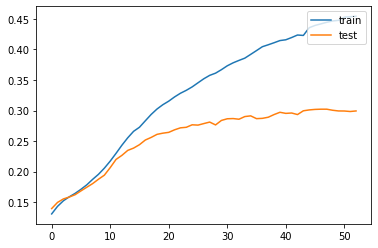

In [42]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('accuracy.png')
plt.show()

In [43]:
# Saving encoder as in training
encoder_model = Model(encoder_inputs, encoder_states)

# Saving decoder states and dense layer 
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)
encoder_model.summary()
decoder_model.summary()
encoder_model.save(os.getcwd() + '\\model\\encoder_model.h5')
decoder_model.save_weights(os.getcwd() + '\\model\\decoder_model_weights.h5')
with open(os.getcwd() + '\\model\\' + '\\tokenizer'+ str(num_decoder_tokens),'wb') as file:
    joblib.dump(tokenizer, file)
plot_model(encoder_model, to_file='model_inference_encoder.png', show_shapes=True, show_layer_names=True)
plot_model(decoder_model, to_file='model_inference_decoder.png', show_shapes=True, show_layer_names=True)

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_inputs (InputLayer)  [(None, 80, 4096)]       0         
                                                                 
 endcoder_lstm (LSTM)        [(None, 80, 512),         9439232   
                              (None, 512),                       
                              (None, 512)]                       
                                                                 
Total params: 9,439,232
Trainable params: 9,439,232
Non-trainable params: 0
_________________________________________________________________
Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 decoder_inputs (InputLayer)    [(None, 10, 1500)]   0           []                             

In [2]:
class Video2Text(object):
    ''' Initialize the parameters for the model '''
    def __init__(self):
        self.latent_dim = 512
        self.num_encoder_tokens = 4096
        self.num_decoder_tokens = 1500
        self.time_steps_encoder = 80
        self.time_steps_decoder = None
     
        self.max_probability = -1

        # processed data
        self.encoder_input_data = []
        self.decoder_input_data = []
        self.decoder_target_data = []
        self.tokenizer = None

        # models
        self.encoder_model = None
        self.decoder_model = None
        self.inf_encoder_model = None
        self.inf_decoder_model = None
        self.save_model_path = 'model_final'
        self.test_path = 'testing_data'
        
    def load_inference_models(self):
        with open(os.getcwd() + '\\model\\new_model\\tokenizer1500', 'rb') as file:
            self.tokenizer = joblib.load(file)

        # inference encoder model
        self.inf_encoder_model = load_model(os.getcwd() + '\\model\\new_model\\encoder_model_reduced.h5')

        # inference decoder model
        decoder_inputs = Input(shape=(None, self.num_decoder_tokens))
        decoder_dense = Dense(self.num_decoder_tokens, activation='softmax')
        decoder_lstm = LSTM(self.latent_dim, return_sequences=True, return_state=True)
        decoder_state_input_h = Input(shape=(self.latent_dim,))
        decoder_state_input_c = Input(shape=(self.latent_dim,))
        decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
        decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
        decoder_states = [state_h, state_c]
        decoder_outputs = decoder_dense(decoder_outputs)
        self.inf_decoder_model = Model(
            [decoder_inputs] + decoder_states_inputs,
            [decoder_outputs] + decoder_states)
        self.inf_decoder_model.load_weights(os.getcwd() + '\\model\\new_model\\decoder_model_weights_reduced.h5')
    
    
    def decode_sequence2bs(self, input_seq):
        states_value = self.inf_encoder_model.predict(input_seq)
        target_seq = np.zeros((1, 1, self.num_decoder_tokens))
        target_seq[0, 0, self.tokenizer.word_index['start']] = 1
        self.beam_search(target_seq, states_value,[],[],0)
        return decode_seq

    def beam_search(self, target_seq, states_value, prob,  path, lens):
        global decode_seq
        node = 2
        output_tokens, h, c = self.inf_decoder_model.predict(
            [target_seq] + states_value)
        output_tokens = output_tokens.reshape((self.num_decoder_tokens))
        sampled_token_index = output_tokens.argsort()[-node:][::-1]
        states_value = [h, c]
        for i in range(node):
            if sampled_token_index[i] == 0:
                sampled_char = ''
            else:
                sampled_char = list(self.tokenizer.word_index.keys())[list(self.tokenizer.word_index.values()).index(sampled_token_index[i])]
            MAX_LEN = 10
            if(sampled_char != 'end' and lens <= MAX_LEN):
                p = output_tokens[sampled_token_index[i]]
                if(sampled_char == ''):
                    p = 1
                prob_new = list(prob)
                prob_new.append(p)
                path_new = list(path)
                path_new.append(sampled_char)
                target_seq = np.zeros((1, 1, self.num_decoder_tokens))
                target_seq[0, 0, sampled_token_index[i]] = 1.
                self.beam_search(target_seq, states_value, prob_new, path_new, lens+1)
            else:
                p = output_tokens[sampled_token_index[i]]
                prob_new = list(prob)
                prob_new.append(p)
                p = functools.reduce(operator.mul, prob_new, 1)
                if(p > self.max_probability):
                    decode_seq = path
                    self.max_probability = p
                    
    def decoded_sentence_tuning(self, decoded_sentence):
        decode_str = []
        filter_string = ['start', 'end']
        unigram = {}
        last_string = ""
        for idx2, c in enumerate(decoded_sentence):
            if c in unigram:
                unigram[c] += 1
            else:
                unigram[c] = 1
            if(last_string == c and idx2 > 0):
                continue
            if c in filter_string:
                continue
            if len(c) > 0:
                decode_str.append(c)
            if idx2 > 0:
                last_string = c
        return decode_str

    def get_test_data(self):
        X_test = []
        X_test_filename = []
        with open (os.getcwd() + '\\testing_id.txt') as testing_file:
            lines = testing_file.readlines()
            for filename in lines:
                filename = filename.strip()
                f = np.load(os.getcwd() + '\\testing_data\\' + str(filename) + '.npy')
                X_test.append(f)
                X_test_filename.append(filename[:-4])
            X_test = np.array(X_test)
        return X_test, X_test_filename

    
    def test(self):
        X_test, X_test_filename = self.get_test_data()
        print(len(X_test), len(X_test_filename))
        # generate inference test outputs
        with open(os.getcwd() + '\\model\\test_output.txt', 'w') as file:
            for idx, x in enumerate(X_test): 
                file.write(X_test_filename[idx]+',')
                decoded_sentence = self.decode_sequence2bs(x.reshape(-1, 80, 4096))
                decode_str = self.decoded_sentence_tuning(decoded_sentence)
                print(decode_str)
                for d in decode_str:
                    file.write(d + ' ')
                file.write('\n')
                # re-init max prob
                self.max_probability = -1
                
                
        

In [3]:
c = Video2Text()
c.load_inference_models()
c.test()

5 5
['a', 'the', 'and', 'a', 'and', 'a']
['a', 'the', 'and', 'a']
['a', 'the', 'and', 'a']
['a', 'the', 'and', 'a']
['a', 'the', 'in', 'a']


In [4]:
class VideoDescriptionRealTime(object):
    ''' Initialize the parameters for the model '''
    def __init__(self):
        self.latent_dim = 512
        self.num_encoder_tokens = 4096
        self.num_decoder_tokens = 1500
        self.time_steps_encoder = 80
        self.time_steps_decoder = None
        self.preload = True
        self.preload_data_path = 'preload_data'
        self.max_probability = -1
        self.search_type = 'greedy'

        # processed data
        self.encoder_input_data = []
        self.decoder_input_data = []
        self.decoder_target_data = []
        self.tokenizer = None

        # models
        self.encoder_model = None
        self.decoder_model = None
        self.inf_encoder_model = None
        self.inf_decoder_model = None
        self.save_model_path = 'model_final'
        self.test_path = 'testing_data'
        
    def load_inference_models(self):
        with open(os.getcwd() + '\\model\\new_model\\tokenizer1500', 'rb') as file:
            self.tokenizer = joblib.load(file)

        # inference encoder model
        self.inf_encoder_model = load_model(os.getcwd() + '\\model\\new_model\\encoder_model_reduced.h5')

        # inference decoder model
        decoder_inputs = Input(shape=(None, self.num_decoder_tokens))
        decoder_dense = Dense(self.num_decoder_tokens, activation='softmax')
        decoder_lstm = LSTM(self.latent_dim, return_sequences=True, return_state=True)
        decoder_state_input_h = Input(shape=(self.latent_dim,))
        decoder_state_input_c = Input(shape=(self.latent_dim,))
        decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
        decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
        decoder_states = [state_h, state_c]
        decoder_outputs = decoder_dense(decoder_outputs)
        self.inf_decoder_model = Model(
            [decoder_inputs] + decoder_states_inputs,
            [decoder_outputs] + decoder_states)
        self.inf_decoder_model.load_weights(os.getcwd() + '\\model\\new_model\\decoder_model_weights_reduced.h5')
    
    def greedy_search(self, f):
        """
        :param f: the loaded numpy array after creating videos to frames and extracting features
        :return: the final sentence which has been predicted greedily
        """
        inv_map = self.index_to_word()
        states_value = self.inf_encoder_model.predict(f.reshape(-1, 80, 4096))
        target_seq = np.zeros((1, 1, 1500))
        final_sentence = ''
        target_seq[0, 0, self.tokenizer.word_index['start']] = 1
        for i in range(15):
            output_tokens, h, c = self.inf_decoder_model.predict([target_seq] + states_value)
            states_value = [h, c]
            output_tokens = output_tokens.reshape(self.num_decoder_tokens)
            y_hat = np.argmax(output_tokens)
            if y_hat == 0:
                continue
            if inv_map[y_hat] is None:
                break
            if inv_map[y_hat] == 'end':
                break
            else:
                final_sentence = final_sentence + inv_map[y_hat] + ' '
                target_seq = np.zeros((1, 1, 1500))
                target_seq[0, 0, y_hat] = 1
        return final_sentence
    
    
    def decode_sequence2bs(self, input_seq):
        states_value = self.inf_encoder_model.predict(input_seq)
        target_seq = np.zeros((1, 1, self.num_decoder_tokens))
        target_seq[0, 0, self.tokenizer.word_index['start']] = 1
        self.beam_search(target_seq, states_value,[],[],0)
        return decode_seq
    
    def beam_search(self, target_seq, states_value, prob,  path, lens):
        global decode_seq
        node = 2
        output_tokens, h, c = self.inf_decoder_model.predict(
            [target_seq] + states_value)
        output_tokens = output_tokens.reshape((self.num_decoder_tokens))
        sampled_token_index = output_tokens.argsort()[-node:][::-1]
        states_value = [h, c]
        for i in range(node):
            if sampled_token_index[i] == 0:
                sampled_char = ''
            else:
                sampled_char = list(self.tokenizer.word_index.keys())[list(self.tokenizer.word_index.values()).index(sampled_token_index[i])]
            MAX_LEN = 10
            if(sampled_char != 'end' and lens <= MAX_LEN):
                p = output_tokens[sampled_token_index[i]]
                if(sampled_char == ''):
                    p = 1
                prob_new = list(prob)
                prob_new.append(p)
                path_new = list(path)
                path_new.append(sampled_char)
                target_seq = np.zeros((1, 1, self.num_decoder_tokens))
                target_seq[0, 0, sampled_token_index[i]] = 1.
                self.beam_search(target_seq, states_value, prob_new, path_new, lens+1)
            else:
                p = output_tokens[sampled_token_index[i]]
                prob_new = list(prob)
                prob_new.append(p)
                p = functools.reduce(operator.mul, prob_new, 1)
                if(p > self.max_probability):
                    decode_seq = path
                    self.max_probability = p
                    
        
    def index_to_word(self):
        # inverts word tokenizer
        index_to_word = {value: key for key, value in self.tokenizer.word_index.items()}
        return index_to_word   
    
    
    def get_test_data(self):
        X_test = []
        X_test_filename = []
        with open (os.getcwd() + '\\testing_id.txt') as testing_file:
            lines = testing_file.readlines()
            for filename in lines:
                filename = filename.strip()
                f = np.load(os.getcwd() + '\\testing_data\\' + str(filename) + '.npy')
                X_test.append(f)
                X_test_filename.append(filename[:-4])
            X_test = np.array(X_test)
        return X_test, X_test_filename

    def test(self):
#         X_test, X_test_filename = self.get_test_data()
# #         print(len(X_test), len(X_test_filename))
# #         sentence_predicted = self.greedy_search(X_test.reshape((-1, 80, 4096)))
#         if self.search_type == 'greedy':
#             sentence_predicted = self.greedy_search(X_test.reshape((-1, 80, 4096)))
#         else:
#             sentence_predicted = ''
#             decoded_sentence = self.decode_sequence2bs(X_test.reshape((-1, 80, 4096)))
#             decode_str = self.decoded_sentence_tuning(decoded_sentence)
#             for d in decode_str:
#                 sentence_predicted = sentence_predicted + d + ' '
#         # re-init max prob
#         self.max_probability = -1
#         return sentence_predicted, filename

        
    
    
    
    
    
    

In [5]:
c = VideoDescriptionRealTime()
c.load_inference_models()
c.test()

ValueError: Data cardinality is ambiguous:
  x sizes: 1, 5, 5
Make sure all arrays contain the same number of samples.